
1. But de l'exercice : Votre objectif est de créer un simple réseau de neurones convolutifs (CNN) pour la classification d'images. Pour cet exercice, vous pouvez utiliser l'ensemble de données CIFAR-10 qui est une collection d'images de 10 classes différentes.
2. Tâches :
    - Faites un train de ce model sur GPU
    - Modifier le CNN en ajoutant des couches suplémentaires
    - Crée une séquence Conv2d --> BatchNorm2d --> ReLU
    - Réalisez plusieurs entraînements avec des couches et des paramètres différents, puis comparez les résultats en utilisant `from sklearn.metrics import classification_report`.

In [7]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.nn.functional import relu

batch_size = 4

# Load and normalize the CIFAR10 training and test datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [11]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

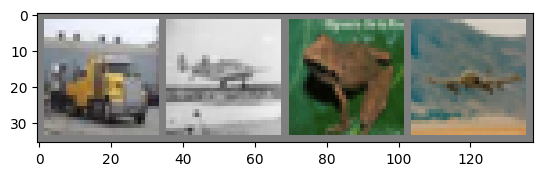

truck plane frog  plane
Shape torch.Size([4, 3, 32, 32])


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Batch, color chan, width, height
print("Shape", images.shape)

In [2]:
# Define a simple CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(relu(self.conv1(x)))
        x = self.pool(relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Create a Net
net = Net()

# Define Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.276
[1,  4000] loss: 1.947
[1,  6000] loss: 1.732
[1,  8000] loss: 1.647
[1, 10000] loss: 1.556
[1, 12000] loss: 1.502
[2,  2000] loss: 1.420
[2,  4000] loss: 1.385
[2,  6000] loss: 1.387
[2,  8000] loss: 1.335
[2, 10000] loss: 1.298
[2, 12000] loss: 1.273
Finished Training
